## Let's first important data

In [1]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
dataset = pd.read_csv('../input/train.csv')

## Let's check the data

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#So we need to first study of our data

#So first of all
# 1 - PassengerId - Column does not depend on survive   
# 2 - Pclacss - it's needed for prediction      [--Select--]
# 4 - Name - it's not useful for our prediction
# 5 - Sex - Male/ Female depends on survived because female always get a first chance   [--Select--]
# 6 - Age - Age depends on survivde  [--Select--]
# 7 - SibSp - Having siblings/spouse depends on survived  [--Select--]
# 8 - Parch - Number of childs depends on survived  [--Select--]
# 9 - Ticket - Ticket not create impact on survived
#10 - Fare - Fare create impact om survived because who have a costly tickets ,that person have more chance to get first in lifeboat  [--Select--]
#11 - Cabin - Cabin have more null values and its not create any impact on survived
#12 - Embarked - it's create impact on survived  [--Select--]

## Now visualize the data

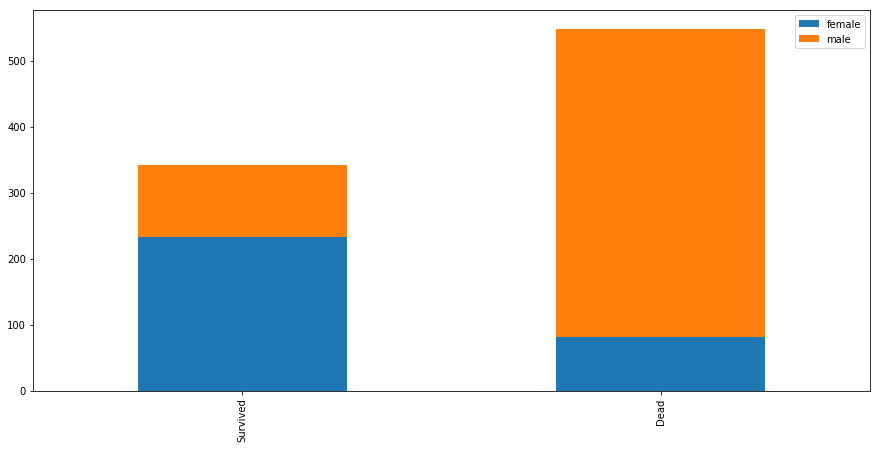

In [9]:
##Let's create funcition for barplot
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))
    
bar_chart('Sex')

* **According to Barchart females survived more than male**

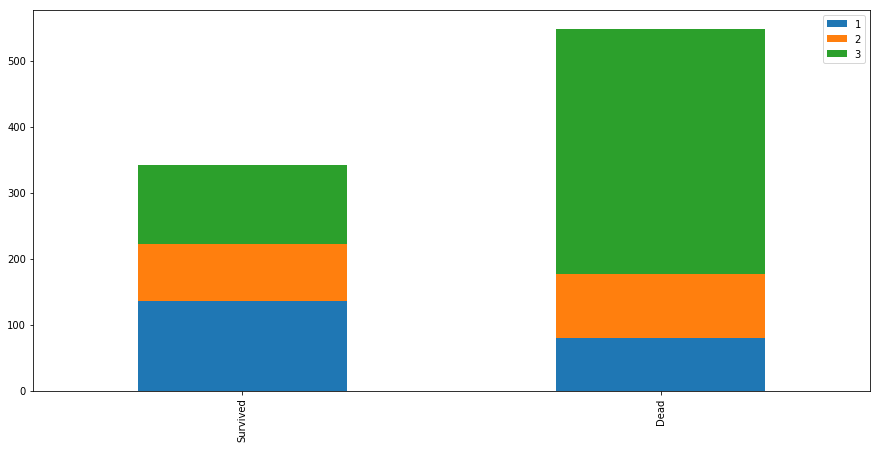

In [10]:
##Now let's see a barplot of Pclass
bar_chart('Pclass')

**The Chart confirms 1st class people more survivied than other classes**

**The Chart confirms 3rd class people more dead than other classes**

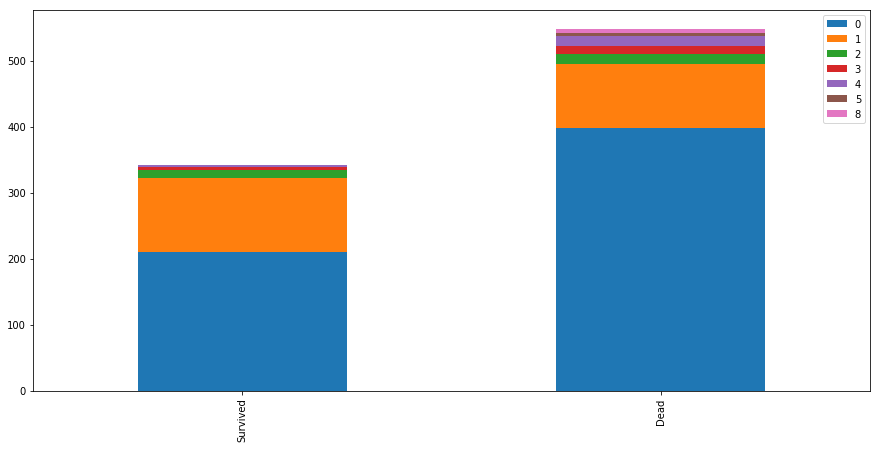

In [11]:
##Let's see for SibSp
bar_chart('SibSp')

**The Chart confirms a person aboarded with more than 2 siblings or spouse are survived**

**The Chart confirms a person aboarded without siblings or spouse are dead**

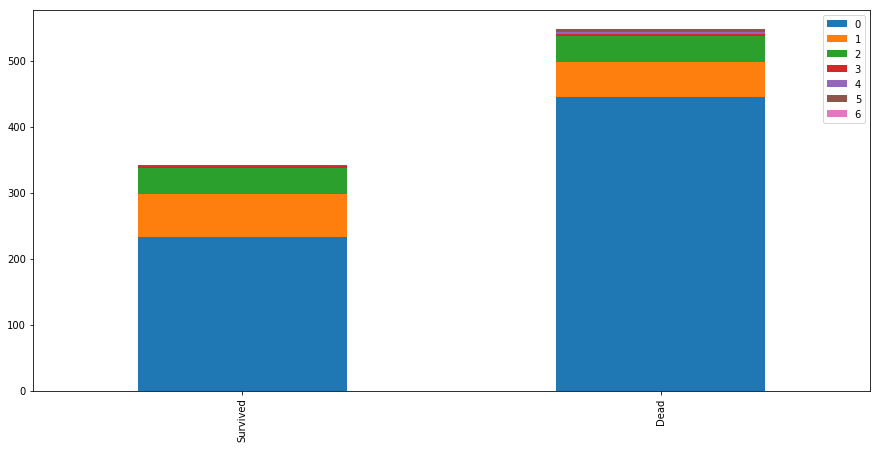

In [12]:
##Let's see for Parch
bar_chart('Parch')

**The Chart confirms a person aboarded with more than 2 parents or children are survived**

**The Chart confirms a person aboarded alone are dead**

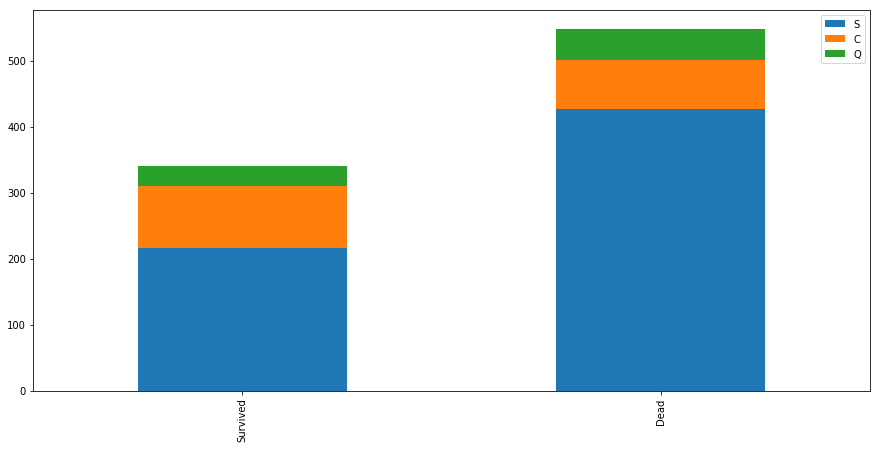

In [13]:
##Let's plot the Embarked
bar_chart('Embarked')

**The Chart confirms a person aboarded from C slightly more likely survived**

**The Chart confirms a person aboarded from Q more likely dead**

**The Chart confirms a person aboarded from S more likely dead**

## Let's devide data into X & Y

In [14]:
##Now let's make a list of our features matrix list
features= [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
##Let's devide in X and Y
x = dataset[features]
y = dataset['Survived']

In [15]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Now check the null values & fill it

In [16]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
##Now fill the null values
x['Age'] = x['Age'].fillna(x['Age'].median())
x['Embarked']= x['Embarked'].fillna(x['Embarked'].value_counts().index[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Let's encode the categorical values

In [19]:
###Now let's enocde categorical values 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x['Embarked'] = LE.fit_transform(x['Embarked'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Check the x

In [20]:
##let's see x
print(x)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  22.0      1      0    7.2500         2
1         1    0  38.0      1      0   71.2833         0
2         3    0  26.0      0      0    7.9250         2
3         1    0  35.0      1      0   53.1000         2
4         3    1  35.0      0      0    8.0500         2
5         3    1  28.0      0      0    8.4583         1
6         1    1  54.0      0      0   51.8625         2
7         3    1   2.0      3      1   21.0750         2
8         3    0  27.0      0      2   11.1333         2
9         2    0  14.0      1      0   30.0708         0
10        3    0   4.0      1      1   16.7000         2
11        1    0  58.0      0      0   26.5500         2
12        3    1  20.0      0      0    8.0500         2
13        3    1  39.0      1      5   31.2750         2
14        3    0  14.0      0      0    7.8542         2
15        2    0  55.0      0      0   16.0000         2
16        3    1   2.0      4  

# Now the check NULL values in Y

In [21]:
##Now let's check null values in Y
y.isnull().sum()

0

# Now we have to split the data into training & testing

In [22]:
##Now everything is ok 
##Now let's Split the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =0)

# Now we have to create a Machine Learning Model 

In [23]:
##Now we fit our model
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8555555555555555

**That's good we got a 0.85 accuracy**

## Now we have to get a Test data in Dataframe

In [24]:
##Now take the test data for prediction
test_data = pd.read_csv('../input/test.csv')
test_x = test_data[features]

In [25]:
##test_x is our testing data which we will give to our model for prediction
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# Let's check NULL values in Test dataset

In [26]:
test_x.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

# Let's fill NULL values

In [27]:
##Let's fill values
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].median())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
test_x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Let's encode a categorical value in Test Data

In [29]:
##Let's enocde categorical values
test_x['Sex'] = LE.fit_transform(test_x['Sex'])
test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# Let's predict a Testing data with our XGB Model

In [31]:
##Now we predict the values
prediction = classifier.predict(test_x)

# Let' convert our prediction int Submission.csv

In [33]:
##Now according to rules we have to store a prediction in csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()
##Submission.csv is a file which we have to submit in a competition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
